In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import math
import seaborn as sns

In [2]:
df = pd.read_csv("rhc.csv")

In [3]:
df.describe()

,Unnamed: 0,sadmdte,dschdte,dthdte,lstctdte,cardiohx,chfhx,dementhx,psychhx,chrpulhx,...,bili1,crea1,sod1,pot1,paco21,ph1,wtkilo1,adld3p,urin1,ptid
count,5735.000000,5735.000000,5734.000000,3722.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,...,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,1439.000000,2707.000000,5735.000000
mean,2868.000000,11638.686312,11660.050401,11753.869156,11781.257890,0.176635,0.178030,0.098344,0.067306,0.189887,...,2.267067,2.133017,136.768963,4.066693,38.748975,7.388413,67.827817,1.182071,2192.453665,5134.006452
std,1655.696228,513.967751,513.447322,538.812330,524.094168,0.381393,0.382571,0.297805,0.250573,0.392246,...,4.801538,2.053080,7.655160,1.028353,13.183445,0.109812,29.055534,1.819057,1525.140006,2972.206379
min,1.000000,10754.000000,10757.000000,10757.000000,10756.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.099991,0.099991,101.000000,1.099854,1.000000,6.579102,0.000000,0.000000,0.000000,5.000000
25%,1434.500000,11163.500000,11184.000000,11267.000000,11316.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.799927,1.000000,132.000000,3.399902,31.000000,7.339844,56.299990,0.000000,1110.000000,2561.500000
50%,2868.000000,11759.000000,11777.000000,11831.500000,11868.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.009766,1.500000,136.000000,3.799805,37.000000,7.399998,70.000000,0.000000,1927.000000,5131.000000
75%,4301.500000,12097.000000,12120.000000,12208.000000,12244.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.399902,2.399902,142.000000,4.599609,42.000000,7.459961,83.699950,2.000000,2955.000000,7689.000000
max,5735.000000,12441.000000,12560.000000,12783.000000,12644.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,58.195312,25.097656,178.000000,11.898438,156.000000,7.769531,244.000000,7.000000,9000.000000,10278.000000


In [4]:
# swang1 is the treatment variable, "No RHC" or "RHC"
df.swang1.value_counts()

No RHC    3551
RHC       2184
Name: swang1, dtype: int64

In [5]:
# death is the target variable, "Yes", "No"
df.death.value_counts()

Yes    3722
No     2013
Name: death, dtype: int64

In [6]:
# First overview of the effect of the treatment on death

sm = df.groupby("swang1").death.describe()

print("Death Rate after the treatment is")

print(sm["freq"]/sm["count"])

Death Rate after the treatment is
swang1
No RHC    0.629682
RHC       0.680403
dtype: object


In [7]:
# Let's see who gets treated. 

df.groupby("swang1").mean()

#As you can see there are some differences for some covariates.

,Unnamed: 0,sadmdte,dschdte,dthdte,lstctdte,cardiohx,chfhx,dementhx,psychhx,chrpulhx,...,bili1,crea1,sod1,pot1,paco21,ph1,wtkilo1,adld3p,urin1,ptid
swang1,,,,,,,,,,,,,,,,,,,,,
No RHC,2846.19403,11644.929034,11664.458181,11773.388193,11792.833005,0.159673,0.167840,0.116305,0.080541,0.217967,...,1.997319,1.923643,137.037173,4.077257,39.952595,7.393453,65.040241,1.244042,2199.180723,5094.929034
RHC,2903.45467,11628.536172,11652.880440,11724.498654,11762.437729,0.204212,0.194597,0.069139,0.045788,0.144231,...,2.705654,2.473441,136.332875,4.049517,36.791990,7.380220,72.360180,1.015385,2182.671070,5197.543040


In [8]:
# First, change the variable to numerical values.

df["death"].replace(["Yes", "No"], [1, 0], inplace = True)
df["swang1"].replace(["RHC", "No RHC"], [1,0], inplace = True)
# separate control and treatment for t-test

df_control = df[df.swang1==0]
df_treatment = df[df.swang1==1]

In [9]:
# student's t-test for death 
from scipy.stats import ttest_ind

print(df_control.death.mean(), df_treatment.death.mean())

# compare samples
_, p = ttest_ind(df_control.death, df_treatment.death)
print(f'p={p:.3f}')

# interpret
alpha = 0.05  # significance level
if p > alpha:
    print('same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('different distributions/different group mean (reject H0)')

0.6296817797803436 0.6804029304029304
p=0.000
different distributions/different group mean (reject H0)


In [10]:
# Let us focus on some of the variables for simplicity.

df_copy = df.copy()
df_copy = df_copy[["swang1", "cat1", "sex", "death", "age", "meanbp1", "aps1"]]
df_copy = pd.get_dummies(df_copy)
df_copy.head()

,swang1,death,age,meanbp1,aps1,cat1_ARF,cat1_CHF,cat1_COPD,cat1_Cirrhosis,cat1_Colon Cancer,cat1_Coma,cat1_Lung Cancer,cat1_MOSF w/Malignancy,cat1_MOSF w/Sepsis,sex_Female,sex_Male
0,0,0,70.25098,41.0,46,0,0,1,0,0,0,0,0,0,0,1
1,1,1,78.17896,63.0,50,0,0,0,0,0,0,0,0,1,1,0
2,1,0,46.09198,57.0,82,0,0,0,0,0,0,0,1,0,1,0
3,0,1,75.33197,55.0,48,1,0,0,0,0,0,0,0,0,1,0
4,1,1,67.90997,65.0,72,0,0,0,0,0,0,0,0,1,0,1


In [11]:
y = df_copy.swang1
X = df_copy.drop(['death','swang1'], axis = 1)

In [12]:
X.fillna(X.median(), inplace=True)
X = pd.get_dummies(X)

In [13]:
logistic = LogisticRegression(max_iter=10000)
logistic.fit(X, y)
logistic.coef_.ravel()

array([-0.00320101, -0.00755402,  0.01819054,  0.24641484,  0.89934196,
       -0.94985681, -0.5632686 , -0.18893393, -0.3080356 , -0.63226365,
        0.03816992,  0.85069339, -0.37253036, -0.23520811])

In [14]:
coeffs = pd.DataFrame({
    'column':X.columns.to_numpy(),
    'coeff':logistic.coef_.ravel(),
})
coeffs

,column,coeff
0,age,-0.003201
1,meanbp1,-0.007554
2,aps1,0.018191
3,cat1_ARF,0.246415
4,cat1_CHF,0.899342
5,cat1_COPD,-0.949857
6,cat1_Cirrhosis,-0.563269
7,cat1_Colon Cancer,-0.188934
8,cat1_Coma,-0.308036
9,cat1_Lung Cancer,-0.632264


In [15]:
pred = logistic.predict(X)
pred_prob = logistic.predict_proba(X)  # probabilities for classes

print('the binary prediction is:', pred[0])
print('the corresponding probabilities are:', pred_prob[0])

the binary prediction is: 0
the corresponding probabilities are: [0.83170516 0.16829484]


In [38]:
# the propensity score (ps) is the probability of being 1 (i.e., in the treatment group)
df_copy['ps'] = pred_prob[:, 1]

# calculate the logit of the propensity score for matching if needed
# I just use the propensity score to match in this tutorial
def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

df_copy['ps_logit'] = df_copy.ps.apply(lambda x: logit(x))

df_copy.head()

,swang1,death,age,meanbp1,aps1,cat1_ARF,cat1_CHF,cat1_COPD,cat1_Cirrhosis,cat1_Colon Cancer,cat1_Coma,cat1_Lung Cancer,cat1_MOSF w/Malignancy,cat1_MOSF w/Sepsis,sex_Female,sex_Male,matched,ps,ps_logit
0,0,0,70.25098,41.0,46,0,0,1,0,0,0,0,0,0,0,1,NaN,0.168295,-1.597761
1,1,1,78.17896,63.0,50,0,0,0,0,0,0,0,0,1,1,0,2256.0,0.486669,-0.053336
2,1,0,46.09198,57.0,82,0,0,0,0,0,0,0,1,0,1,0,4824.0,0.466120,-0.135728
3,0,1,75.33197,55.0,48,1,0,0,0,0,0,0,0,0,1,0,NaN,0.348770,-0.624451
4,1,1,67.90997,65.0,72,0,0,0,0,0,0,0,0,1,0,1,3258.0,0.622915,0.501941


<AxesSubplot:xlabel='ps', ylabel='Count'>

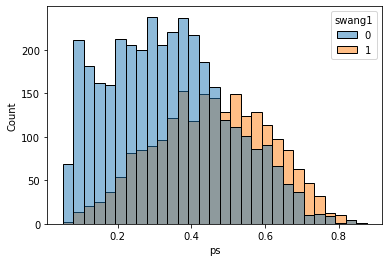

In [39]:
# check the overlap of ps for control and treatment using histogram
# if not much overlap, the matching won't work
sns.histplot(data=df, x='ps', hue='swang1')  

# As you can see, many overlaps.

In [55]:
# use 25% of standard deviation of the propensity score as the caliper/radius
# get the k closest neighbors for each observations
# relax caliper and increase k can provide more matches

from sklearn.neighbors import NearestNeighbors

caliper = np.std(df.ps) * 0.5
print(f'caliper (radius) is: {caliper:.4f}')

n_neighbors = 10

# setup knn
knn = NearestNeighbors(n_neighbors=n_neighbors, radius=caliper)

ps = df[['ps']]  # double brackets as a dataframe
knn.fit(ps)

caliper (radius) is: 0.0849


NearestNeighbors(n_neighbors=10, radius=0.08494136026556187)

In [56]:
# distances and indexes
distances, neighbor_indexes = knn.kneighbors(ps)

print(neighbor_indexes.shape)

# the 10 closest points to the first point
print(distances[0])
print(neighbor_indexes[0])

(5735, 10)
[0.         0.00014252 0.00016038 0.00022382 0.00034936 0.00039903
 0.00045467 0.00045734 0.0005187  0.00057918]
[   0 2119 1454 4332 3357 2547  942 4598 3007  944]


In [57]:
# for each point in treatment, we find a matching point in control without replacement
# note the 10 neighbors may include both points in treatment and control

matched_control = []  # keep track of the matched observations in control

for current_index, row in df.iterrows():  # iterate over the dataframe
    if row.swang1 == 0:  # the current row is in the control group
        df_copy.loc[current_index, 'matched'] = np.nan  # set matched to nan
    else: 
        for idx in neighbor_indexes[current_index, :]: # for each row in treatment, find the k neighbors
            # make sure the current row is not the idx - don't match to itself
            # and the neighbor is in the control 
            if (current_index != idx) and (df_copy.loc[idx].swang1 == 0):
                if idx not in matched_control:  # this control has not been matched yet
                    df_copy.loc[current_index, 'matched'] = idx  # record the matching
                    matched_control.append(idx)  # add the matched to the list
                    break

In [60]:
print('total observations in treatment:', len(df[df.swang1==1]))
print('total matched observations in control:', len(matched_control))

total observations in treatment: 2184
total matched observations in control: 1690


In [61]:
# control have no match
treatment_matched = df_copy.dropna(subset=['matched'])  # drop not matched

# matched control observation indexes
control_matched_idx = treatment_matched.matched
control_matched_idx = control_matched_idx.astype(int)  # change to int
control_matched = df_copy.loc[control_matched_idx, :]  # select matched control observations

# combine the matched treatment and control
df_matched = pd.concat([treatment_matched, control_matched])

df_matched.swang1.value_counts()

1    1690
0    1690
Name: swang1, dtype: int64

In [62]:
df_matched_control = df_matched[df_matched.swang1==0]
df_matched_treatment = df_matched[df_matched.swang1==1]

In [65]:
from scipy.stats import ttest_ind
print(df_matched_control.death.mean(), df_matched_treatment.death.mean())

# compare samples
_, p = ttest_ind(df_matched_control.death, df_matched_treatment.death)
print(f'p={p:.3f}')

# interpret
alpha = 0.05  # significance level
if p > alpha:
    print('same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)')
else:
    print('different distributions/different group mean (reject H0)')

0.6526627218934912 0.670414201183432
p=0.276
same distributions/same group mean (fail to reject H0 - we do not have enough evidence to reject H0)


<AxesSubplot:>

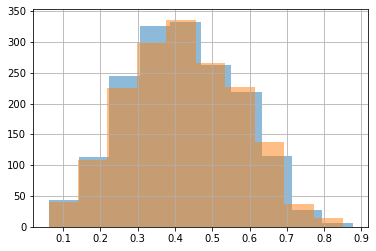

In [66]:
df_matched_control.ps.hist(alpha = 0.5)
df_matched_treatment.ps.hist(alpha = 0.5)

#It seems like the match has been succesful